## We are provided with some properties of diamond and we need to predict the price of diamond.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
## checking for any missing values 

In [4]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
df.isnull().sum().sum()

0

In [6]:
## No misssing values 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [8]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [9]:
##3 categorical variable 
#8 numerical variable

In [10]:
df=df.drop(['id'], axis=1)

In [11]:
df ##removing the id column

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [12]:
df.duplicated().sum() ## no duplicates inn the data 

0

In [13]:
## segregating numerical and categorical columns

In [14]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']

In [15]:
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [16]:
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [17]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [18]:
df[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [19]:
df['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

In [20]:
df['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

In [21]:
df['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

In [22]:
#Rank is to be given to the categorical varible 

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

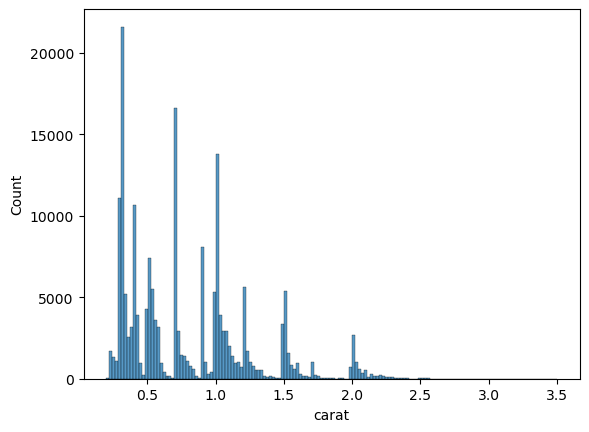

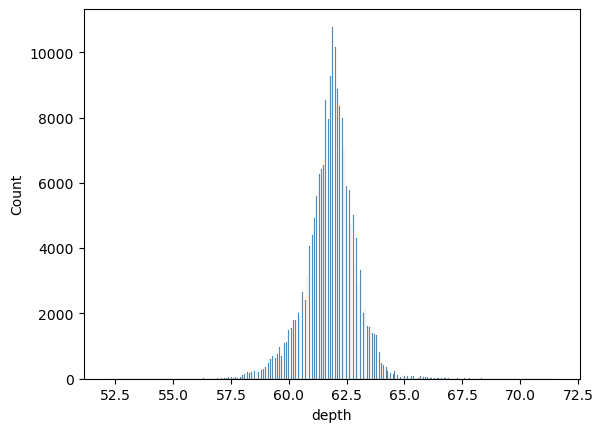

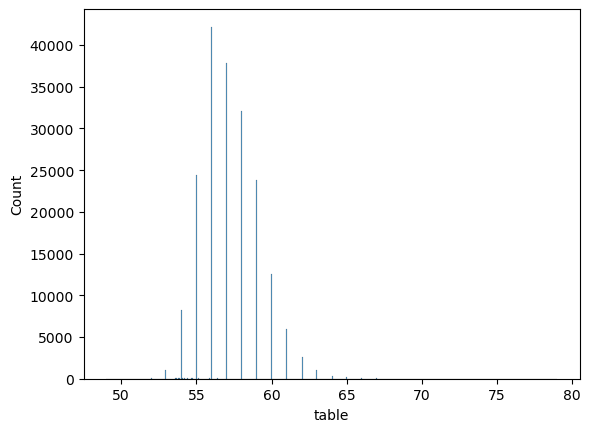

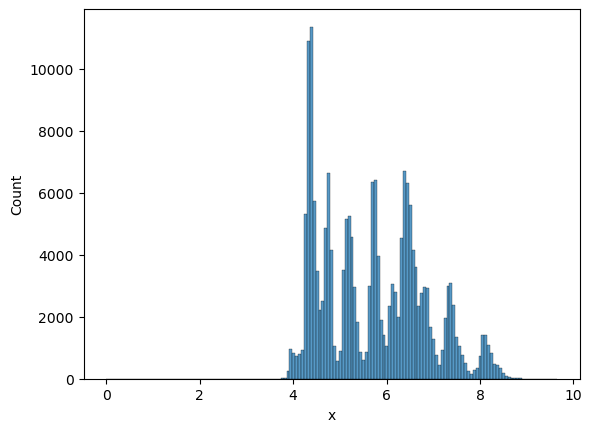

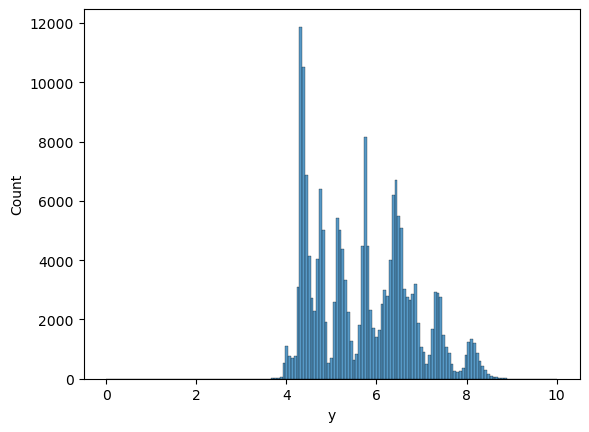

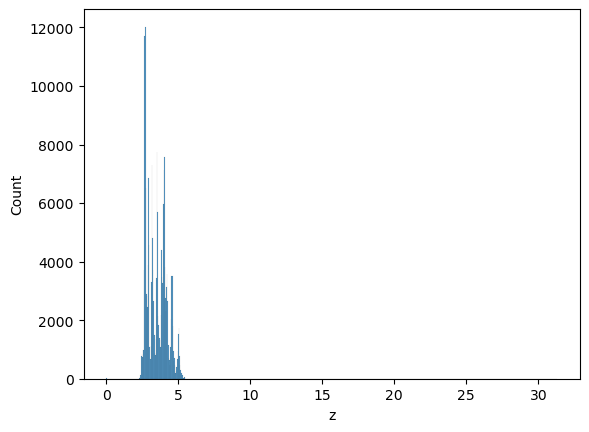

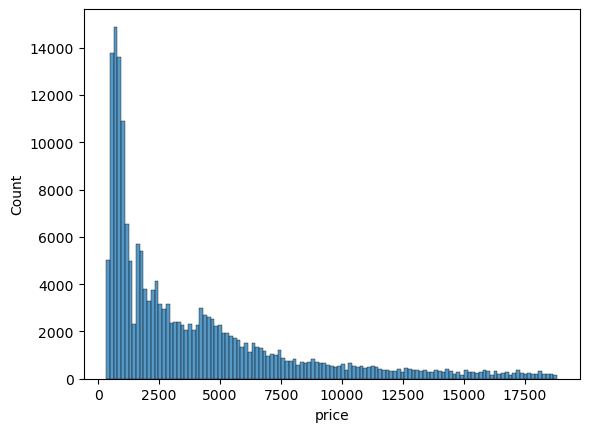

In [24]:
plt.figure()
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i)
    print('\n')
    plt.show()

<Axes: xlabel='color', ylabel='count'>

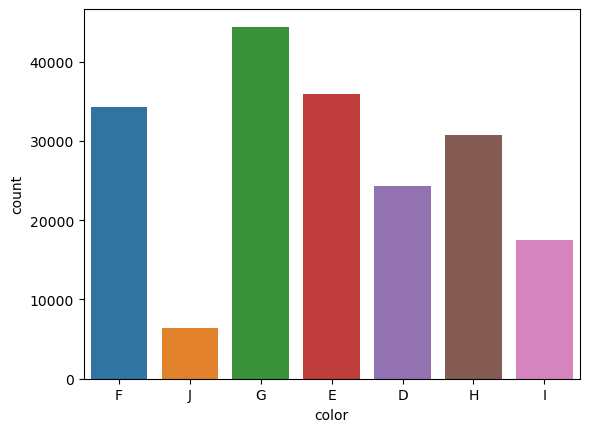

In [25]:
sns.countplot(data=df,x='color')

<Axes: xlabel='clarity', ylabel='count'>

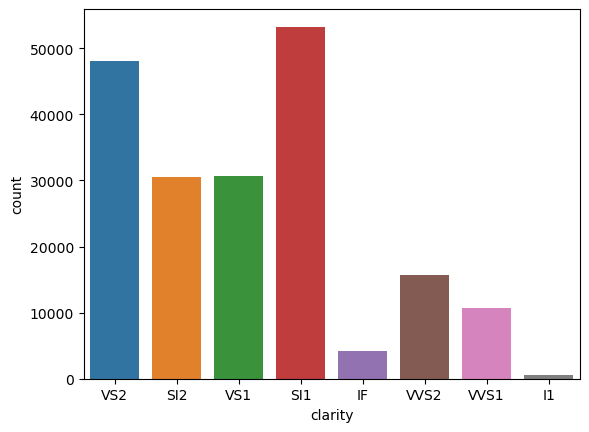

In [26]:
sns.countplot(data=df,x='clarity')

<Axes: xlabel='cut', ylabel='count'>

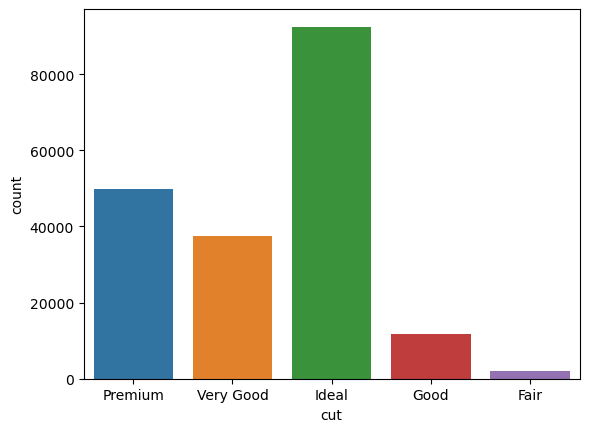

In [27]:
sns.countplot(data=df,x='cut')

<Axes: xlabel='cut', ylabel='count'>

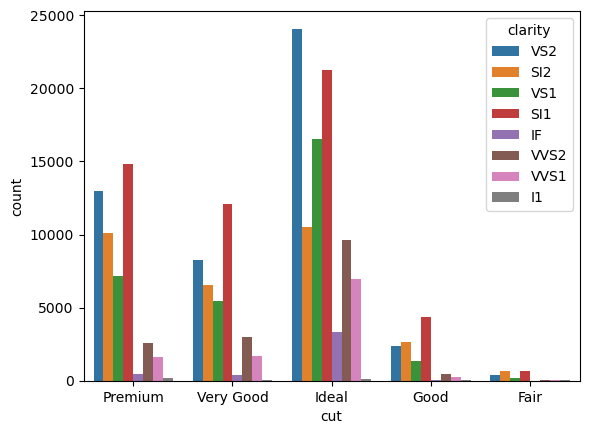

In [28]:
sns.countplot(data=df,x='cut',hue='clarity')

<Axes: xlabel='price', ylabel='Count'>

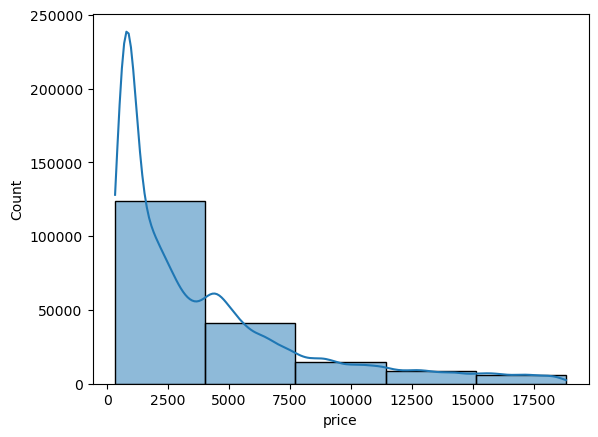

In [29]:
sns.histplot(data=df,x='price',bins=5,kde=True)

Here we can see that most of the diamonds which are bought are generally in the lower price braket.

<Axes: xlabel='carat', ylabel='Count'>

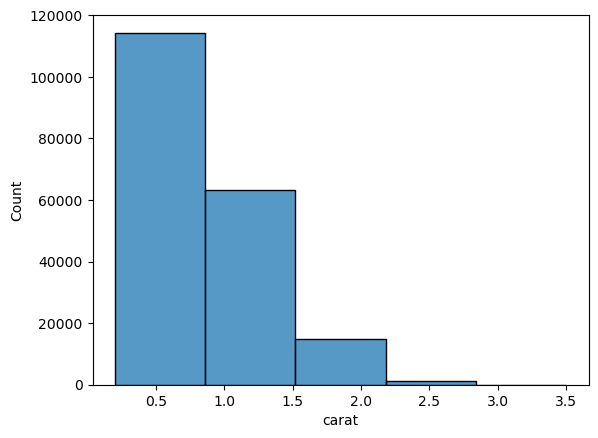

In [30]:
sns.histplot(data=df,x='carat',bins=5)

In [31]:
## positively skewed data for the carat feature too most of it lies in the o.5 to 1.5 carat segment. 

A diamond's table is the facet which can be seen when the stone is viewed face up

<Axes: xlabel='table', ylabel='Count'>

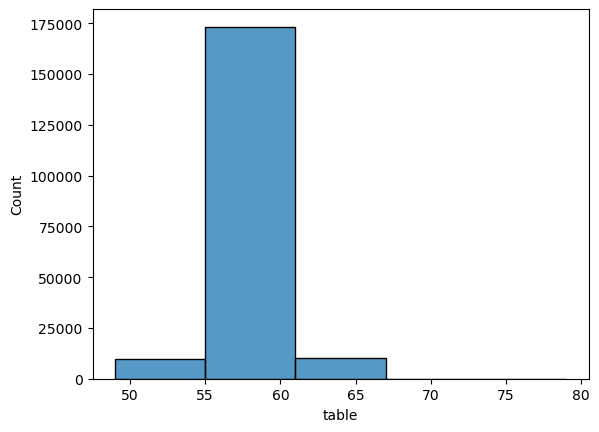

In [32]:
sns.histplot(data=df,x='table',bins=5)

F:\anacond\Lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


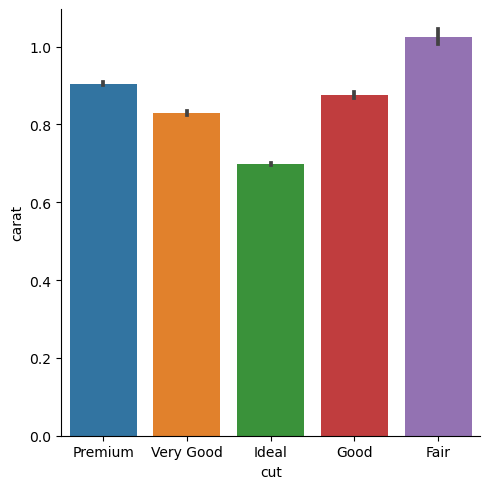

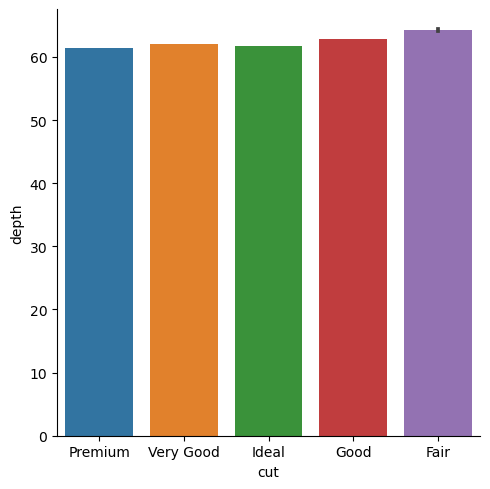

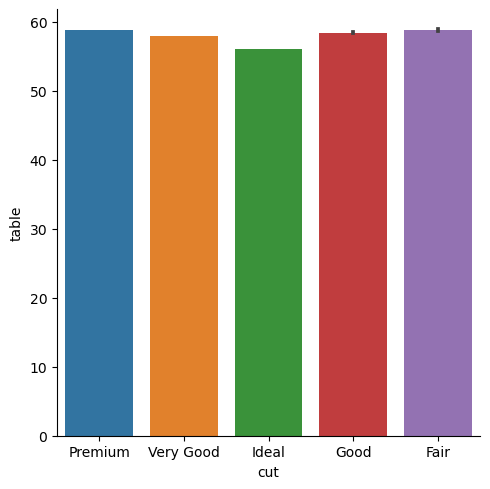

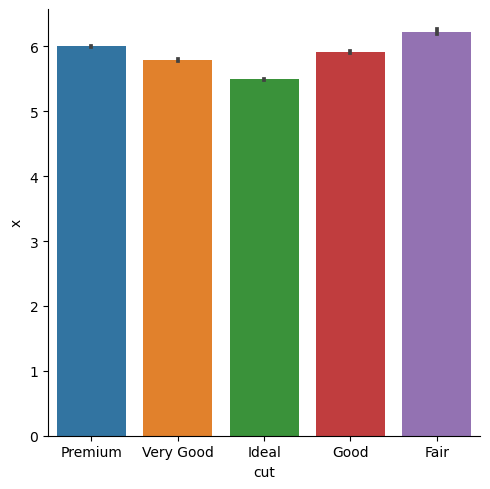

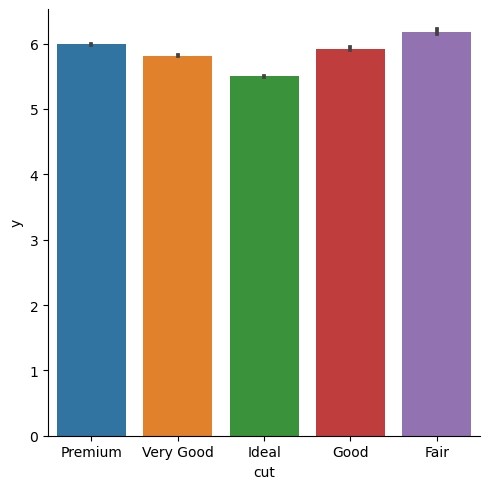

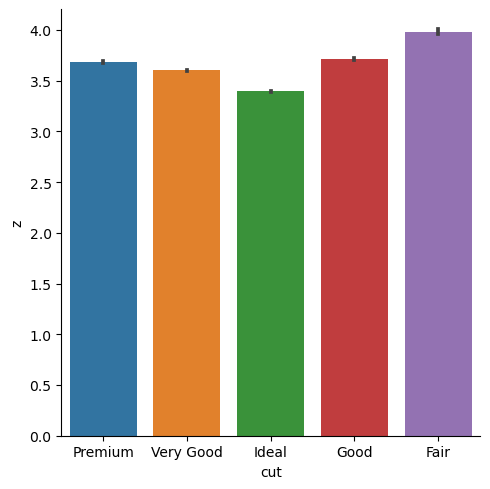

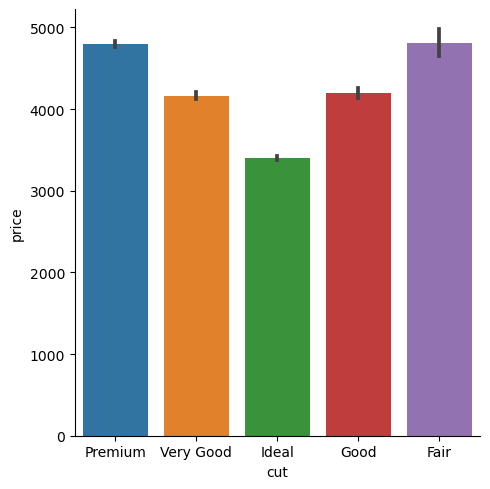

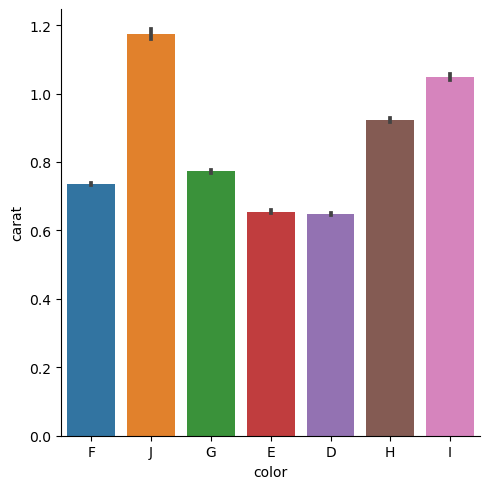

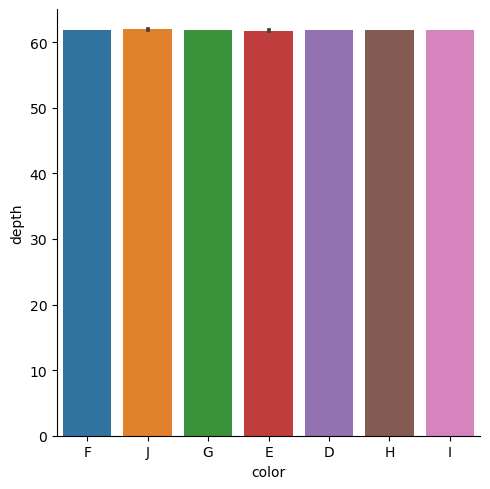

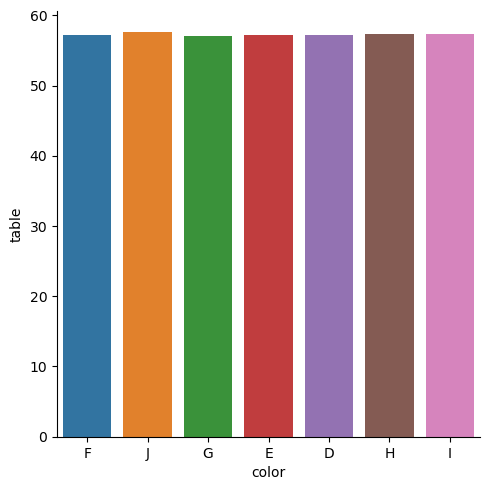

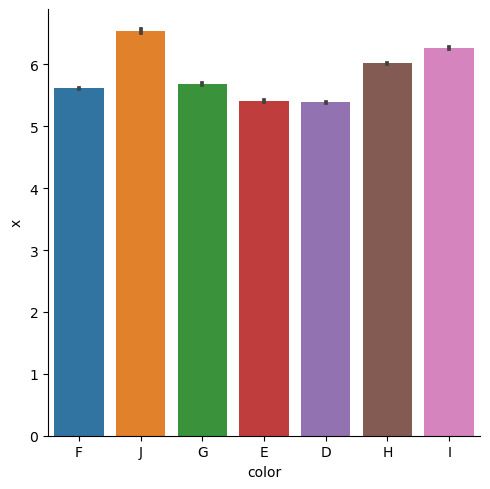

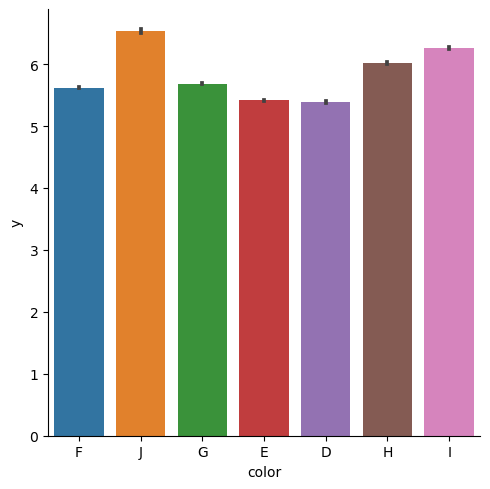

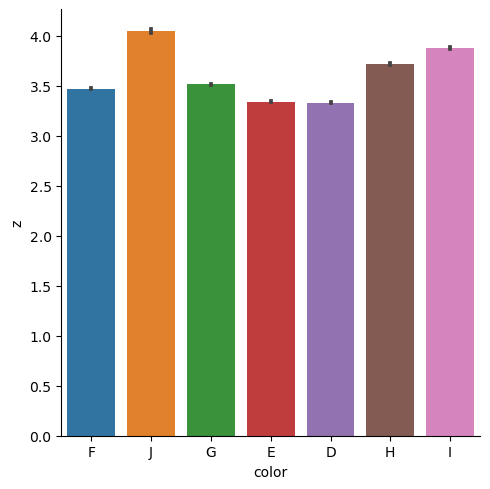

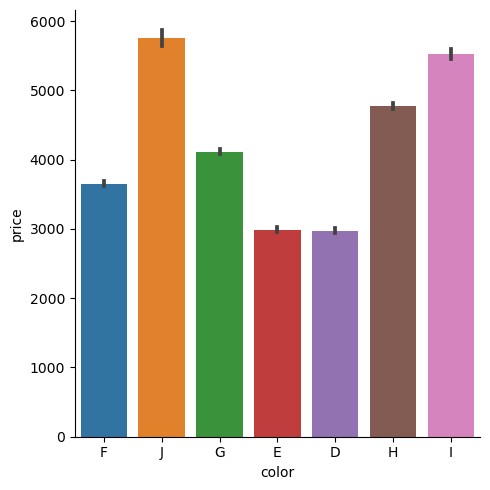

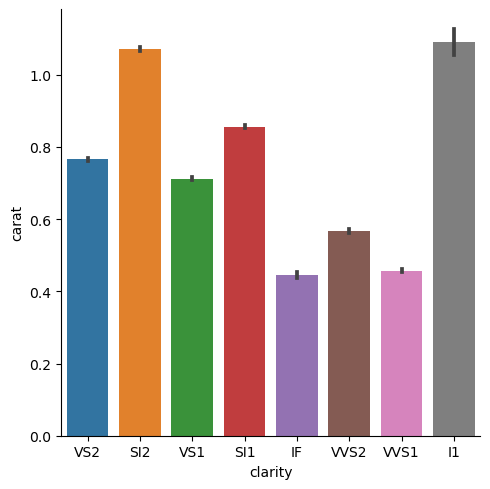

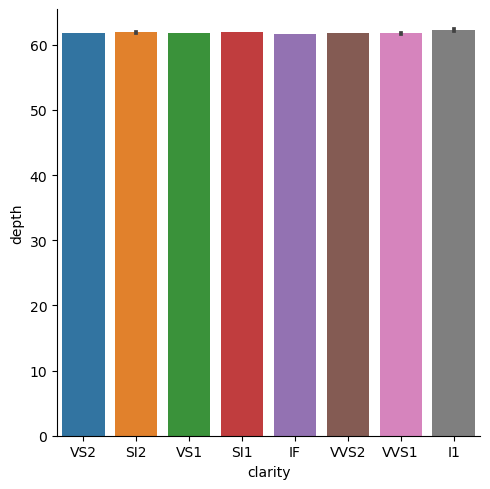

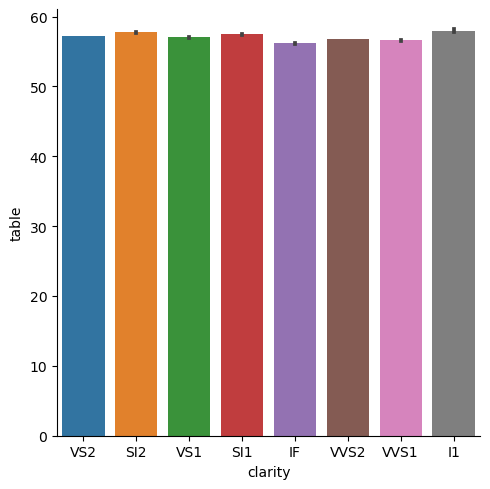

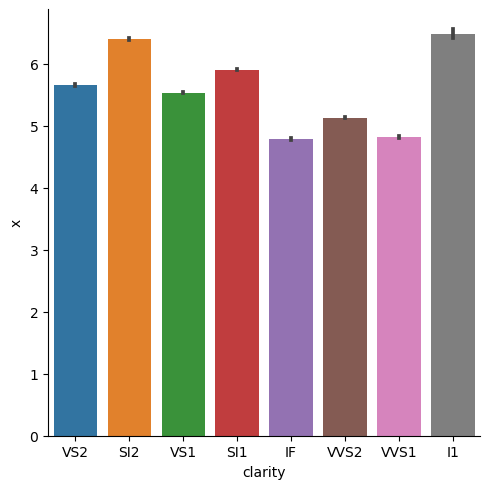

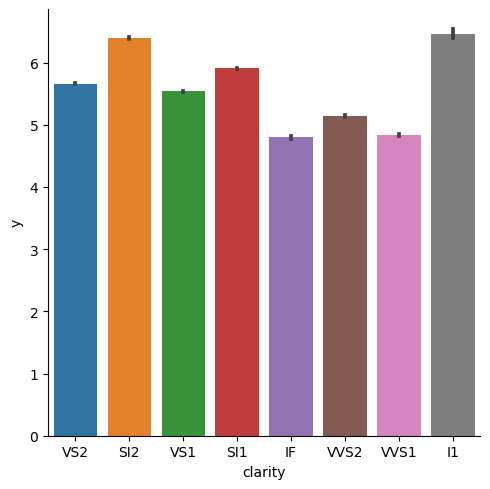

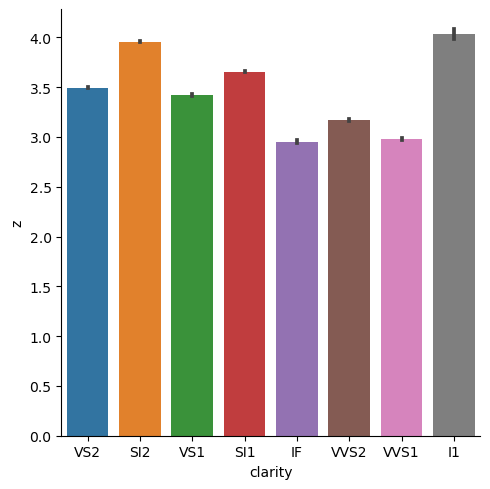

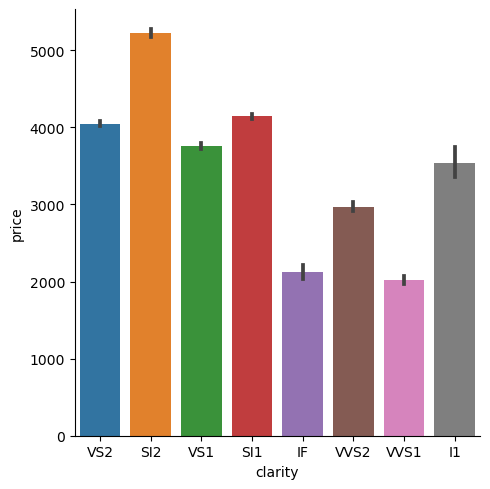

In [33]:
for cat in categorical_columns:
    for num in numerical_columns:
        sns.catplot(x=cat, y=num, data=df, kind="bar")

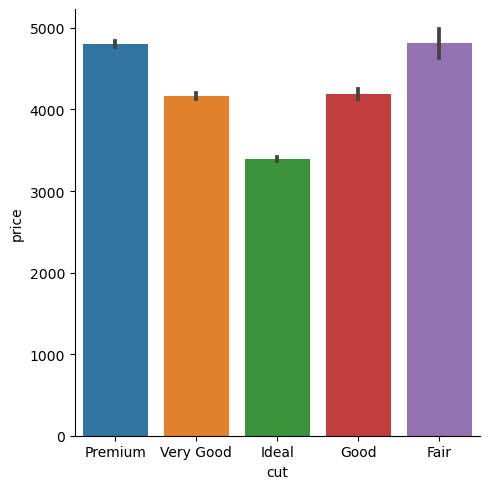

In [34]:
sns.catplot(x="cut", y="price", data=df, kind="bar")

<Axes: >

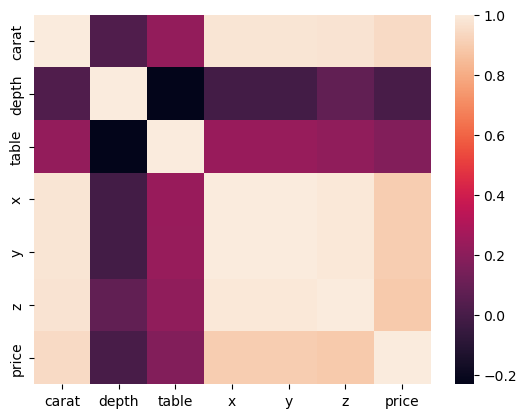

In [35]:
sns.heatmap(df[numerical_columns].corr())

<Axes: >

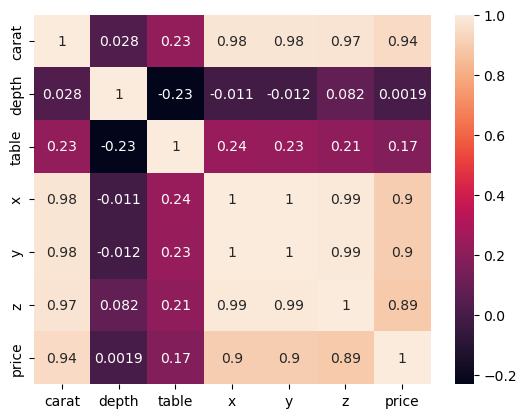

In [36]:
sns.heatmap(df[numerical_columns].corr(),annot=True) ## checking the dependency in between all the numerical columns

# Here we see that x ,y ,z are highly positively corelated with each other and carat and price.

In [37]:
##Currently we will not execute this
## df.drop(labels=['x','y','z'],axis=1)

In [38]:
# https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/
df['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

In [39]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [40]:
df['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

In [41]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [42]:
df['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

In [43]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [44]:
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [45]:
color_map.values()

dict_values([1, 2, 3, 4, 5, 6, 7])

In [46]:
clarity_map.values()

dict_values([1, 2, 3, 4, 5, 6, 7, 8])

In [47]:
cut_map.values()

dict_values([1, 2, 3, 4, 5])

In [48]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [49]:
df['cut']=df['cut'].map(cut_map)
df['color']=df['color'].map(color_map)
df['clarity']=df['clarity'].map(clarity_map)

In [50]:
##Thus ranking has been given to them.
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [51]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681


In [52]:
df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

## Model Training

In [53]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [54]:
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

In [55]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81


In [56]:
Y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


In [57]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681


In [58]:
from sklearn.preprocessing import StandardScaler

In [69]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81


In [71]:
Y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


In [72]:
scaler = StandardScaler()

In [73]:
scaler.fit(X)

StandardScaler()

In [75]:
StandardScaler

sklearn.preprocessing._data.StandardScaler

In [76]:
normalized_data = scaler.transform(X)

In [77]:
normalized_df = pd.DataFrame(normalized_data, columns=X.columns)

In [78]:
normalized_df

,carat,cut,color,clarity,depth,table,x,y,z
0,1.576255,-0.132929,-0.318009,0.016591,0.350768,0.402496,1.401353,1.460456,1.474414
1,2.678513,-1.138809,2.146431,-1.315169,0.165874,0.402496,2.113437,2.177120,2.200187
2,-0.196003,0.872951,0.298101,0.682471,-0.573702,-0.118652,-0.022816,0.008986,-0.049710
3,-1.017293,0.872951,0.298101,0.682471,-0.203914,-0.639801,-1.203614,-1.188477,-1.196432
4,1.965288,-0.132929,0.298101,0.016591,0.720555,0.923644,1.743874,1.714463,1.793754
...,...,...,...,...,...,...,...,...,...
193568,-1.038906,0.872951,-1.550229,1.348351,-0.666149,-0.639801,-1.230655,-1.206620,-1.254494
193569,-0.196003,-0.132929,0.298101,1.348351,-1.405724,0.402496,0.031267,0.045273,-0.093257
193570,-0.131164,-1.138809,-0.318009,-0.649289,1.182790,-0.118652,0.004226,0.027129,0.124475
193571,-0.974067,-1.138809,-1.550229,-0.649289,0.997896,-1.160949,-1.140517,-1.115903,-1.051277


In [79]:
normalized_X=normalized_df

In [80]:
X=normalized_df

In [81]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.576255,-0.132929,-0.318009,0.016591,0.350768,0.402496,1.401353,1.460456,1.474414
1,2.678513,-1.138809,2.146431,-1.315169,0.165874,0.402496,2.113437,2.177120,2.200187
2,-0.196003,0.872951,0.298101,0.682471,-0.573702,-0.118652,-0.022816,0.008986,-0.049710
3,-1.017293,0.872951,0.298101,0.682471,-0.203914,-0.639801,-1.203614,-1.188477,-1.196432
4,1.965288,-0.132929,0.298101,0.016591,0.720555,0.923644,1.743874,1.714463,1.793754
...,...,...,...,...,...,...,...,...,...
193568,-1.038906,0.872951,-1.550229,1.348351,-0.666149,-0.639801,-1.230655,-1.206620,-1.254494
193569,-0.196003,-0.132929,0.298101,1.348351,-1.405724,0.402496,0.031267,0.045273,-0.093257
193570,-0.131164,-1.138809,-0.318009,-0.649289,1.182790,-0.118652,0.004226,0.027129,0.124475
193571,-0.974067,-1.138809,-1.550229,-0.649289,0.997896,-1.160949,-1.140517,-1.115903,-1.051277


In [82]:
Y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


## ## Train test split

In [83]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [84]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
168192,-0.974067,0.872951,1.530321,1.348351,-0.851043,-0.118652,-1.041367,-1.079617,-1.123855
35202,0.236255,-2.144689,-0.934119,-0.649289,1.829919,-0.118652,0.319706,0.281137,0.487362
41091,0.495610,-0.132929,0.298101,0.682471,0.813002,0.402496,0.572090,0.607717,0.676063
31239,-1.017293,-0.132929,0.298101,0.016591,0.258321,0.923644,-1.212627,-1.242907,-1.196432
45722,-0.952454,0.872951,2.146431,1.348351,-0.666149,-0.639801,-1.068408,-1.043330,-1.094824
...,...,...,...,...,...,...,...,...,...
66455,-1.038906,0.872951,-0.934119,-0.649289,-0.019020,-0.639801,-1.266710,-1.242907,-1.239978
46220,0.992707,0.872951,0.298101,-1.315169,0.165874,-0.639801,1.049818,1.115732,1.082496
98804,0.452384,-2.144689,0.298101,-0.649289,1.552578,-0.639801,0.518008,0.589574,0.705094
48045,0.668513,0.872951,0.298101,0.682471,-1.775512,1.444793,0.869543,0.952442,0.690579


In [85]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z
70432,-0.563422,-0.132929,-0.934119,0.016591,-0.943490,-0.639801,-0.428433,-0.462742,-0.499690
64839,-0.174390,-1.138809,0.914211,-0.649289,0.997896,-0.118652,-0.040843,-0.027301,0.037383
185316,-1.060519,0.872951,0.914211,2.680111,0.258321,-0.118652,-1.302765,-1.297337,-1.269009
84658,0.971094,-0.132929,0.298101,0.016591,-0.203914,1.965941,1.049818,0.997800,0.980888
31953,-0.930842,-0.132929,-0.934119,0.682471,-1.313277,0.402496,-1.005312,-0.988900,-1.065793
...,...,...,...,...,...,...,...,...,...
192694,1.014320,-1.138809,0.914211,0.016591,1.182790,-0.639801,1.004749,1.043159,1.155074
133935,-0.995680,0.872951,-0.318009,2.014231,0.258321,-1.160949,-1.140517,-1.124975,-1.109339
44763,-0.196003,-0.132929,2.146431,0.016591,-3.347110,1.444793,0.103377,0.072488,-0.223896
29856,-0.822777,0.872951,0.298101,-0.649289,-0.203914,-0.118652,-0.852078,-0.880039,-0.877092


In [86]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

In [87]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [88]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [89]:
regression.coef_

array([[ 6435.31809289,    72.46921588,  -460.29509705,   651.37587894,
         -132.87145894,   -70.45391457, -1720.47535138,  -499.32095901,
          -63.28643765]])

In [90]:
regression.intercept_

array([3969.04575034])

In [93]:
model_list

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet']

In [91]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [94]:
## Train multiple models
## Model Ecaluation
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

#Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*50)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 1013.9047094344002
MAE: 674.0255115796845
R2 score 93.68908248567512


Lasso
Model Training Performance
RMSE: 1013.8783128222101
MAE: 675.0694918680648
R2 score 93.68941108593138


Ridge
Model Training Performance
RMSE: 1013.9059272711355
MAE: 674.0555932826223
R2 score 93.68906732513443


Elasticnet
Model Training Performance
RMSE: 1533.5203477767595
MAE: 1060.8805018153041
R2 score 85.56298828126427


